In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import cmocean
import importlib



In [20]:
importlib.reload(glacier)
ngridx=50
ngridz=20
D=200
L=2e4
dt= 2e2
T= 1e6
zz=20
C,S=glacier.glacier(ngridx,ngridz,dt,zz,T)

Text(0.02, 0.5, 'Depth [m]')

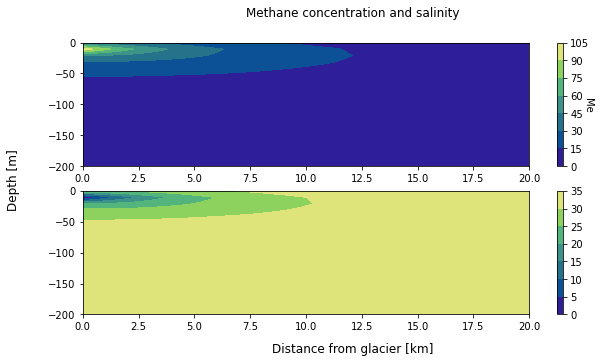

In [21]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=plt.colorbar(c1,ax=axs[0])
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap)
cb2=plt.colorbar(c2,ax=axs[1])
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Methane concentration and salinity')
fig.supxlabel('Distance from glacier [km]')
fig.supylabel('Depth [m]')